<a href="https://colab.research.google.com/github/Ambaya0224/Ambaya-s-leetcode-project/blob/master/PreProcess-Bank-WeeK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType, FloatType, DoubleType, LongType
from pyspark.sql.functions import col, mean, stddev, when, udf


# Create a Spark session
spark = SparkSession.builder \
    .appName("Show Bank Dataset") \
    .getOrCreate()

# Load the dataset (make sure to specify the correct path to your bank.csv file)
df = spark.read.csv('bank.csv', header=True, sep=';', inferSchema=True)
#df1 = spark.read.csv('bank.csv', header=True, inferSchema=True)

#print(df)

# Show the first few rows of the dataset
df.show()

# Optionally, show the schema of the dataset
#df.printSchema()

# Stop the Spark session
#spark.stop()

+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|          job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|   unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 33|     services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|
| 35|   management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|
| 30|   management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|
| 59|  blue-collar|married|secondary|     no|      0|    yes|  no| unknown| 

In [8]:
# Get the list of numeric columns
numeric_columns = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType,
    FloatType, DoubleType, LongType))]
# Create a DataFrame with just the numeric features
numeric_df = df.select(numeric_columns)

# Show the numeric DataFrame
numeric_df.show()
numeric_df.printSchema()
numeric_df.describe().show()

+---+-------+---+--------+--------+-----+--------+
|age|balance|day|duration|campaign|pdays|previous|
+---+-------+---+--------+--------+-----+--------+
| 30|   1787| 19|      79|       1|   -1|       0|
| 33|   4789| 11|     220|       1|  339|       4|
| 35|   1350| 16|     185|       1|  330|       1|
| 30|   1476|  3|     199|       4|   -1|       0|
| 59|      0|  5|     226|       1|   -1|       0|
| 35|    747| 23|     141|       2|  176|       3|
| 36|    307| 14|     341|       1|  330|       2|
| 39|    147|  6|     151|       2|   -1|       0|
| 41|    221| 14|      57|       2|   -1|       0|
| 43|    -88| 17|     313|       1|  147|       2|
| 39|   9374| 20|     273|       1|   -1|       0|
| 43|    264| 17|     113|       2|   -1|       0|
| 36|   1109| 13|     328|       2|   -1|       0|
| 20|    502| 30|     261|       1|   -1|       0|
| 31|    360| 29|      89|       1|  241|       1|
| 40|    194| 29|     189|       2|   -1|       0|
| 56|   4073| 27|     239|     

**1. Mean**

In [9]:
# Get the list of numeric columns
numeric_columns = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType,
    FloatType, DoubleType, LongType))]

# Calculate the mean for each numeric column
mean_values = [df.select(mean(col)).first()[0] for col in numeric_columns]

# Print the means for each features
print(f"Mean: {[f'{x:.2f}' for x in mean_values]}")

'''
# Create a DataFrame
df = spark.createDataFrame([(float(num),) for num in mean_values], ["value"])

# Calculate the mean
mean_value = df.agg(mean("value")).collect()[0][0]

# Print the result
print(f"Mean:, {mean_value:.2f}")
'''

#mean_values = [df[col].mean() for col in numeric_df]
#print(f"Mean: {[f'{x:.2f}' for x in mean_values]}")



print(numeric_df)
print("Mean: ")

# mean_age = numeric_df.agg({"age": "mean"}).collect()[0][0]
# mean_balance = numeric_df.agg({"balance": "mean"}).collect()[0][0]
mean_age = numeric_df.select(mean('age')).first()[0]
mean_balance = numeric_df.select(mean('balance')).first()[0]
mean_day = numeric_df.select(mean('day')).first()[0]
mean_duration = numeric_df.select(mean('duration')).first()[0]
mean_campaign = numeric_df.select(mean('campaign')).first()[0]
mean_pdays = numeric_df.select(mean('pdays')).first()[0]
mean_previous = numeric_df.select(mean('previous')).first()[0]

print(f"age: {mean_age:.2f}")
print(f'balance: {mean_balance:.2f}')
print(f"day: {mean_day:.2f}")
print(f"duration: {mean_duration:.2f}")
print(f"campaign: {mean_campaign:.2f}")
print(f"pdays: {mean_pdays:.2f}")
print(f"previous: {mean_previous:.2f}")


print(f'Dataset Mean: {(mean_age + mean_balance + mean_day + mean_duration + mean_campaign + mean_pdays + mean_previous)/7:.2f}')


Mean: ['41.17', '1422.66', '15.92', '263.96', '2.79', '39.77', '0.54']
DataFrame[age: int, balance: int, day: int, duration: int, campaign: int, pdays: int, previous: int]
Mean: 
age: 41.17
balance: 1422.66
day: 15.92
duration: 263.96
campaign: 2.79
pdays: 39.77
previous: 0.54
Dataset Mean: 255.26


2. **Median**

In [10]:
print(numeric_df)
numeric_df.show()


medians = {}
for features in numeric_df.columns:
  median_value = numeric_df.approxQuantile(features, [0.5], 0.01)[0]
  medians[features] = median_value

print(medians)


DataFrame[age: int, balance: int, day: int, duration: int, campaign: int, pdays: int, previous: int]
+---+-------+---+--------+--------+-----+--------+
|age|balance|day|duration|campaign|pdays|previous|
+---+-------+---+--------+--------+-----+--------+
| 30|   1787| 19|      79|       1|   -1|       0|
| 33|   4789| 11|     220|       1|  339|       4|
| 35|   1350| 16|     185|       1|  330|       1|
| 30|   1476|  3|     199|       4|   -1|       0|
| 59|      0|  5|     226|       1|   -1|       0|
| 35|    747| 23|     141|       2|  176|       3|
| 36|    307| 14|     341|       1|  330|       2|
| 39|    147|  6|     151|       2|   -1|       0|
| 41|    221| 14|      57|       2|   -1|       0|
| 43|    -88| 17|     313|       1|  147|       2|
| 39|   9374| 20|     273|       1|   -1|       0|
| 43|    264| 17|     113|       2|   -1|       0|
| 36|   1109| 13|     328|       2|   -1|       0|
| 20|    502| 30|     261|       1|   -1|       0|
| 31|    360| 29|      89|      

**3. Standart deviation**

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

print(numeric_df)
numeric_df.show()

stddevs = {}
for features in numeric_df.columns:
  stddev_value = numeric_df.agg(F.stddev(features)).collect()[0][0]
  stddevs[features] = stddev_value

print('Standart deviations:')
for features, value in stddevs.items():
  print(f'{features}: {value:.2f}')





DataFrame[age: int, balance: int, day: int, duration: int, campaign: int, pdays: int, previous: int]
+---+-------+---+--------+--------+-----+--------+
|age|balance|day|duration|campaign|pdays|previous|
+---+-------+---+--------+--------+-----+--------+
| 30|   1787| 19|      79|       1|   -1|       0|
| 33|   4789| 11|     220|       1|  339|       4|
| 35|   1350| 16|     185|       1|  330|       1|
| 30|   1476|  3|     199|       4|   -1|       0|
| 59|      0|  5|     226|       1|   -1|       0|
| 35|    747| 23|     141|       2|  176|       3|
| 36|    307| 14|     341|       1|  330|       2|
| 39|    147|  6|     151|       2|   -1|       0|
| 41|    221| 14|      57|       2|   -1|       0|
| 43|    -88| 17|     313|       1|  147|       2|
| 39|   9374| 20|     273|       1|   -1|       0|
| 43|    264| 17|     113|       2|   -1|       0|
| 36|   1109| 13|     328|       2|   -1|       0|
| 20|    502| 30|     261|       1|   -1|       0|
| 31|    360| 29|      89|      

Create a bar graph of the variable/attribute: previous

Column<'previous'>
+---+-------+---+--------+--------+-----+--------+
|age|balance|day|duration|campaign|pdays|previous|
+---+-------+---+--------+--------+-----+--------+
| 30|   1787| 19|      79|       1|   -1|       0|
| 33|   4789| 11|     220|       1|  339|       4|
| 35|   1350| 16|     185|       1|  330|       1|
| 30|   1476|  3|     199|       4|   -1|       0|
| 59|      0|  5|     226|       1|   -1|       0|
| 35|    747| 23|     141|       2|  176|       3|
| 36|    307| 14|     341|       1|  330|       2|
| 39|    147|  6|     151|       2|   -1|       0|
| 41|    221| 14|      57|       2|   -1|       0|
| 43|    -88| 17|     313|       1|  147|       2|
| 39|   9374| 20|     273|       1|   -1|       0|
| 43|    264| 17|     113|       2|   -1|       0|
| 36|   1109| 13|     328|       2|   -1|       0|
| 20|    502| 30|     261|       1|   -1|       0|
| 31|    360| 29|      89|       1|  241|       1|
| 40|    194| 29|     189|       2|   -1|       0|
| 56|   4073

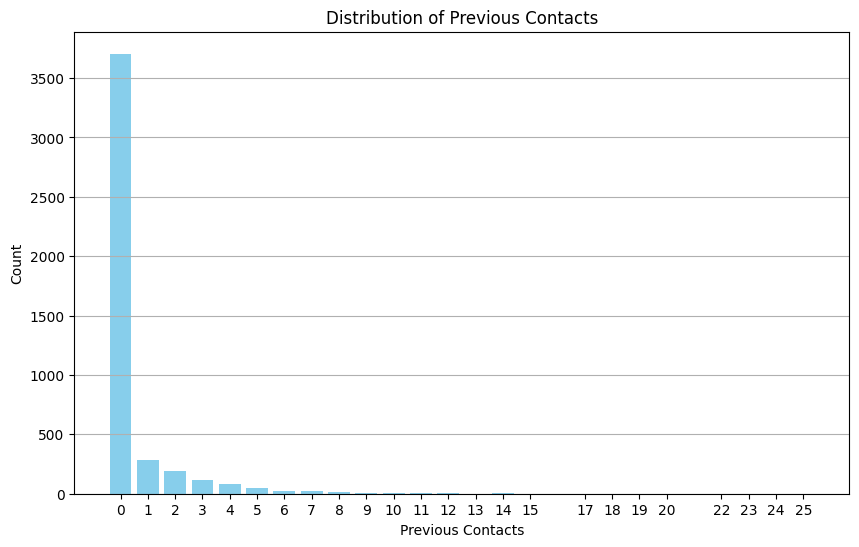

+--------+-----+
|previous|count|
+--------+-----+
|      12|    5|
|      22|    1|
|       1|  286|
|      13|    1|
|       6|   25|
|       3|  113|
|      20|    1|
|       5|   47|
|      19|    1|
|      15|    1|
|       9|   10|
|      17|    1|
|       4|   78|
|       8|   18|
|      23|    1|
|       7|   22|
|      10|    4|
|      25|    1|
|      24|    1|
|      11|    3|
+--------+-----+
only showing top 20 rows

+---+-----+
|age|count|
+---+-----+
| 31|  199|
| 65|    6|
| 53|   94|
| 78|    3|
| 34|  231|
| 81|    1|
| 28|  103|
| 76|    2|
| 26|   77|
| 27|   94|
| 44|  105|
| 22|    9|
| 47|  108|
| 52|   86|
| 86|    1|
| 20|    3|
| 40|  142|
| 57|   91|
| 54|   71|
| 48|  114|
+---+-----+
only showing top 20 rows



In [12]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import max, min

print(numeric_df['previous'])
numeric_df.show()




# Group by 'previous' and count occurrences
previous_counts = numeric_df.groupBy('previous').count()
# Convert to Pandas DataFrame  for plotting
previous_counts_pd = previous_counts.toPandas()

# Group by 'age' and count occurrences
age_counts = numeric_df.groupBy('age').count()
# Convert to Pandas DataFrame  for plotting
age_counts_pd = age_counts.toPandas()


# Find the maximum and minimum counts
max_count = previous_counts.agg(max("count")).collect()[0][0]
min_count = previous_counts.agg(min("count")).collect()[0][0]

# Display max and min counts
print(f"Maximum count: {max_count}")
print(f"Minimum count: {min_count}")


# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(previous_counts_pd['previous'], previous_counts_pd['count'], color='skyblue')
plt.xlabel('Previous Contacts')
plt.ylabel('Count')
plt.title('Distribution of Previous Contacts')
plt.xticks(previous_counts_pd['previous'])    # Ensure all previous values are shown on x-axis
plt.grid(axis='y')
plt.show()


previous_counts.show(20)
age_counts.show(20)


**Create a normalized bar graph of the variable/attribute: previous;**

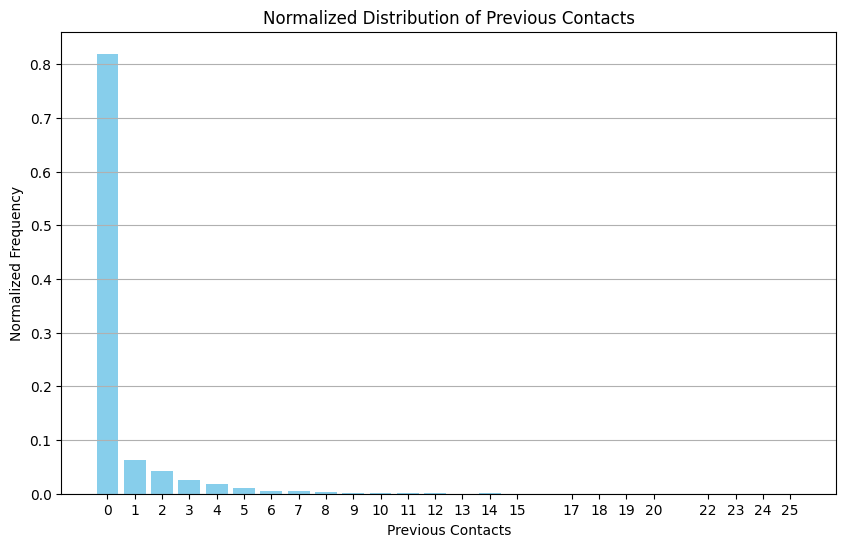

In [14]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import collect_list
# Get the total count
total_count = numeric_df.count()

# Group by 'previous', count, and calculate normalized frequency
previous_counts = numeric_df.groupBy('previous').count()
previous_counts = previous_counts.withColumn('normalized_count', col('count')/total_count)

# Convert to Pandas for plotting
previous_counts_pd = previous_counts.toPandas()

# Plot the normalized bar graph
plt.figure(figsize=(10, 6))
plt.bar(previous_counts_pd['previous'], previous_counts_pd['normalized_count'], color='skyblue')
plt.xlabel('Previous Contacts')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Distribution of Previous Contacts')
plt.xticks(previous_counts_pd['previous'])
plt.grid(axis='y')
plt.show()
